## Part I

### 1.1 Get the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/intro_ml/

/content/gdrive/MyDrive/intro_ml


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_path = "/content/gdrive/MyDrive/intro_ml/"
data_file = "ml_tutorial_1.csv"

In [ ]:
df = pd.read_csv(data_file)
df.head()  #shows you the first few rows of a DataFrame,DataFrame, which is a tabular data structure.

,x,y
0,5.488135,29.654508
1,7.151894,34.993590
2,6.027634,35.994273
3,5.448832,24.815775
4,4.236548,21.034960


In [ ]:
# Converting to numpy arrays. efficient for numerical computations
x = df["x"].to_numpy()
y = df["y"].to_numpy()

### 1.2 Plot the data

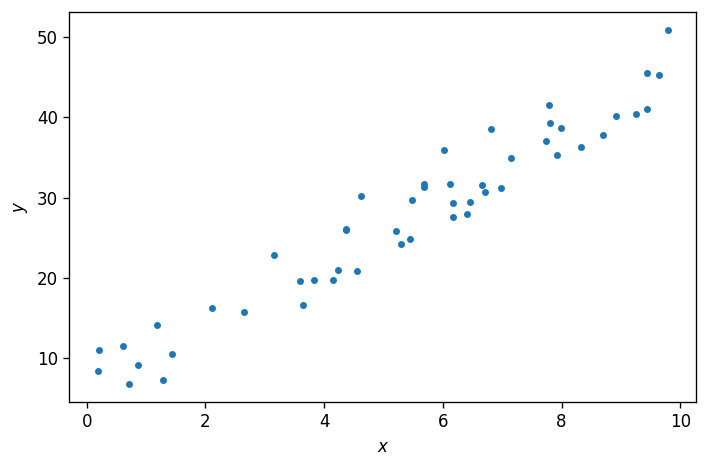

In [ ]:
# plotting the data
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4), dpi=120)
ax.scatter(x, y, s=10)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.tight_layout()

plt.show()

### 1.3 Functions

#### Hypothesis function

In [ ]:
# Single feature linear hypothesis
def h_linear_single_feature(thetas, x):
  # thetas is a list or array containing the model's parameters:
  # thetas[0] is the bias term (θ₀ or y-intercept)
  # thetas[1] is the weight for the feature 'x' (θ₁ or slope).

    return thetas[0] + thetas[1] * x

In [ ]:
x.shape

(50,)

#### Cost function

In [ ]:
# Mean Squared Error (MSE), which measures the average squared difference between the predicted values and the actual values.
def cost_function (thetas, x, y):

  cost = 0
  m= x.shape[0]

  predictions = h_linear_single_feature(thetas, x)  # Calculate predictions

  cost = np.sum((predictions - y)**2) / (2 * m) # Calculate the cost
  return cost

  # try to do it with a for loop to understand the calculations at each iteration.
  # Python loops are slow compared to vectorized operations in numpy.
  # for i in range (m):
  #   h= h_linear_single_feature(thetas,x[i])- y[i]
  #   cost+= (h**2)
  # mse = cost* 1/(2*m)
  # return mse

##### Cost function testing

In [ ]:
# Testing the cost function with different theta_1 values
x_test = np.array([1, 2, 3, 4])
y_test = np.array([2, 4, 6, 8])

# Set intercept term to zero
theta_0 = 0

# List of values for theta_1 (the slope)
theta_1_candidates = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
n= len(theta_1_candidates)
cost=[]

for i in range (n):
  theta_1= theta_1_candidates [i]
  cost_i= cost_function ([theta_0,theta_1], x_test, y_test)
  cost.append(cost_i)

cost # Show different costs


[np.float64(15.0),
 np.float64(8.4375),
 np.float64(3.75),
 np.float64(0.9375),
 np.float64(0.0),
 np.float64(0.9375),
 np.float64(3.75),
 np.float64(8.4375)]

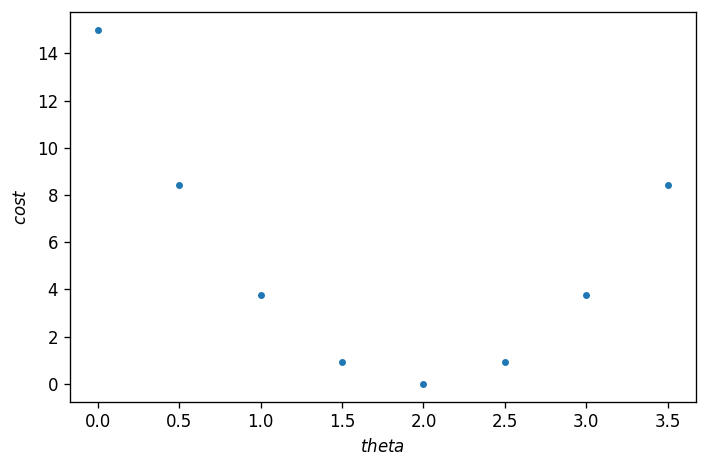

In [ ]:
# Plotting the costs for different theta_1 values
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4), dpi=120)
ax.scatter(theta_1_candidates, cost, s=10)
ax.set_xlabel('$theta$')
ax.set_ylabel('$cost$')
plt.tight_layout()

plt.show()

#### Residuals function

In [ ]:
# calculates the difference between predictions and true_y
def get_residuals(thetas,x,y):

  residuals = h_linear_single_feature(thetas, x) - y

  return residuals


####Gradient Descent function

In [ ]:
# calculates the full gradient terms
def gradient_descent(thetas,x,y):

  m= x.shape[0]

  h = get_residuals(thetas,x,y)

  theta0_gradient = np.sum(h) * (1/m)      # partial derivatives (gradients) of the cost function with respect to theta0
  theta1_gradient = np.sum(h * x) * (1/m)  # partial derivatives (gradients) of the cost function with respect to theta1
  # * is elementwise multiplication followed by a sum => dot product
  return theta0_gradient, theta1_gradient

### 1.4 Linear Regressor Loop

In [ ]:
def should_print_iteration(iter_index, first_step, second_step, index_changing_step):
    """
    Trigger a print if iter_index matches step rules:
    print every `first_step` iterations before `index_changing_step`,
    then every `second_step` iterations afterwards.
    """
    if first_step <= 0 or second_step <= 0:
        raise ValueError("Steps must be positive integers.")

    if iter_index == 0:
        return True  # Always print at the first iteration

    if iter_index <= index_changing_step:
        return iter_index % first_step == 0
    else:
        return iter_index % second_step == 0

In [ ]:
# Hyperparameters
alpha   = 0.01 # controls the size of the steps taken during each iteration of gradient descent.
N       = 20000 # maximum number of times the training loop will run, preventing it from running indefinitely.
epsilon =  0.0001  # tolerance threshold on gradients; exit if abs(gradients) < epsilon

# Initialization
theta_0 = 0
theta_1 = 0

# Check lists of x and y are of same length:
m = len(x)  # sample size
if m != len(y):
    raise ValueError("The lists of x and y values are not the same length!")

# Store parameter values for gradient descent visualizations
theta_0_grad_history = np.array([theta_0])
theta_1_grad_history = np.array([theta_1])

print("Starting gradient descent\n")

# -------------------
#  Start iterations
# -------------------
theta_0_new = theta_0
theta_1_new = theta_1

for iter_idx in range(N):

    #___________________________

    # Your code here
    grad_theta_0 , grad_theta_1 = gradient_descent([theta_0_new , theta_1_new ] , x , y)
    theta_0_new = theta_0_new - alpha * grad_theta_0
    theta_1_new = theta_1_new - alpha * grad_theta_1
    cost = cost_function([theta_0_new , theta_1_new], x, y)



    #___________________________

    # Store thetas (for plotting)
    theta_0_grad_history = np.append(theta_0_grad_history, theta_0_new)
    theta_1_grad_history = np.append(theta_1_grad_history, theta_1_new)

    # Pretty print: every 10 iters until 100, then every 100 iters
    if should_print_iteration(iter_idx, 10, 100, 100):
        print(
            f"Iter {iter_idx:>4}\t"
            f"θ₀ = {theta_0_new:>7.3f}\t∂J/∂θ₀ = {grad_theta_0:>8.4f}\t"
            f"θ₁ = {theta_1_new:>7.3f}\t∂J/∂θ₁ = {grad_theta_1:>8.4f}\t"
            f"Cost = {cost:>8.5f}"
        )

    #___________________________

    # Your code here
    if abs(grad_theta_0) < epsilon and abs(grad_theta_1) < epsilon:
      print (f"Gradient converged, number of iterations {iter_idx+1} ")
      break



    #___________________________

print(f"\nEnd of gradient descent after {iter_idx+1} iterations")# Hyperparameters



Starting gradient descent

Iter    0	θ₀ =   0.276	∂J/∂θ₀ = -27.5948	θ₁ =   1.774	∂J/∂θ₁ = -177.4071	Cost = 178.97358
Iter   10	θ₀ =   0.834	∂J/∂θ₀ =  -1.4018	θ₁ =   4.732	∂J/∂θ₁ =  -1.5360	Cost =  7.52555
Iter   20	θ₀ =   0.952	∂J/∂θ₀ =  -1.1276	θ₁ =   4.743	∂J/∂θ₁ =   0.1510	Cost =  7.37810
Iter   30	θ₀ =   1.064	∂J/∂θ₀ =  -1.1030	θ₁ =   4.727	∂J/∂θ₁ =   0.1640	Cost =  7.25162
Iter   40	θ₀ =   1.173	∂J/∂θ₀ =  -1.0811	θ₁ =   4.711	∂J/∂θ₁ =   0.1609	Cost =  7.13009
Iter   50	θ₀ =   1.280	∂J/∂θ₀ =  -1.0597	θ₁ =   4.695	∂J/∂θ₁ =   0.1577	Cost =  7.01333
Iter   60	θ₀ =   1.384	∂J/∂θ₀ =  -1.0388	θ₁ =   4.679	∂J/∂θ₁ =   0.1546	Cost =  6.90114
Iter   70	θ₀ =   1.487	∂J/∂θ₀ =  -1.0182	θ₁ =   4.664	∂J/∂θ₁ =   0.1515	Cost =  6.79334
Iter   80	θ₀ =   1.588	∂J/∂θ₀ =  -0.9981	θ₁ =   4.649	∂J/∂θ₁ =   0.1485	Cost =  6.68976
Iter   90	θ₀ =   1.687	∂J/∂θ₀ =  -0.9784	θ₁ =   4.634	∂J/∂θ₁ =   0.1456	Cost =  6.59023
Iter  100	θ₀ =   1.783	∂J/∂θ₀ =  -0.9590	θ₁ =   4.620	∂J/∂θ₁ =   0.1427	Cost =  6.49461
Ite

### 1.5 Visualize the gradient descent

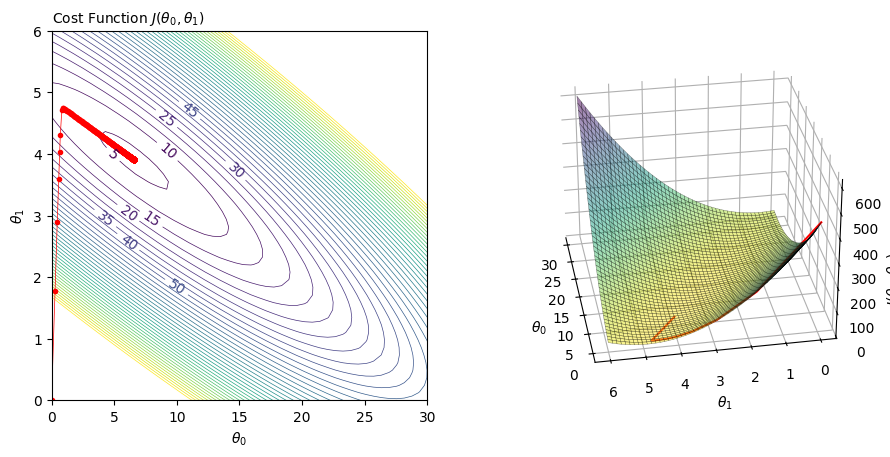

In [ ]:
# Grid for 2D parameter space:
theta_0_grid = np.linspace(0, 30, 50)
theta_1_grid = np.linspace(0, 6, 50)

# Z values of costs for the surface:
meshed_theta_0, meshed_theta_1 = np.meshgrid(theta_0_grid, theta_1_grid)
meshed_costs = np.zeros_like(meshed_theta_0)  # Costs array

for i in range(meshed_theta_0.shape[0]):
    for j in range(meshed_theta_0.shape[1]):
        meshed_costs[i, j] = cost_function(
            [meshed_theta_0[i, j], meshed_theta_1[i, j]], x, y
        )

# Gradient descent: 5 first params then every 10 epochs
intermediary_theta_0_vals = np.concatenate(
    (theta_0_grad_history[0:5], theta_0_grad_history[5::5]), axis=None
)
intermediary_theta_1_vals = np.concatenate(
    (theta_1_grad_history[0:5], theta_1_grad_history[5::5]), axis=None
)

# Cost for selected intermediary weights (one per GD step)
intermediary_grad_cost_history = np.array(
    [
        cost_function([t0, t1], x, y)
        for t0, t1 in zip(intermediary_theta_0_vals, intermediary_theta_1_vals)
    ]
)

plt.rcParams.update(plt.rcParamsDefault)
fig = plt.figure(figsize=plt.figaspect(0.45))  # 16,4

# ==========================
#     Contour plot
# ==========================
plt.rcParams.update(plt.rcParamsDefault)

# Custom cost levels, from 5, step of 5, 200
levs = range(5, 200, 5)

ax = fig.add_subplot(1, 2, 1)

# Contour of theta parameter space:
CS = ax.contour(meshed_theta_0, meshed_theta_1, meshed_costs, levs, linewidths=0.5)
ax.clabel(CS, CS.levels[0:10], inline=1, fontsize=10, fmt="%d")

# Add the intermediary thetas from gradient descent:
ax.plot(intermediary_theta_0_vals, intermediary_theta_1_vals, marker=".", c="r", lw=0.5)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.title("Cost Function $J(\\theta_0, \\theta_1)$", loc="left", fontsize=10)

# ==========================
#     3D plot
# ==========================
ax = fig.add_subplot(1, 2, 2, projection="3d")

# 3D surface of cost vs (theta  0, theta 1):
surf = ax.plot_surface(
    meshed_theta_0,
    meshed_theta_1,
    meshed_costs,
    cmap="viridis_r",
    linewidth=0.3,
    alpha=0.5,
    edgecolor="k",
)

# Path of intermediary thetas from gradient descent:
ax.plot(
    intermediary_theta_0_vals,
    intermediary_theta_1_vals,
    intermediary_grad_cost_history,
    c="r",
)

ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("$J(\\theta_0, \\theta_1)$", rotation=90)
ax.azim = 170
ax.elev = 30
ax.xaxis.set_rotate_label(False)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_rotate_label(False)
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_rotate_label(False)
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

plt.show()

### 1.6 Let’s check with NumPy

In [ ]:
# Verifying the results with np.polyfit
slope, intercept= np.polyfit(x,y, deg=1)
print (f"theta_0 value is {intercept} ")
print (f"theta_1 value is {slope} ")

theta_0 value is 6.580520907666924 
theta_1 value is 3.9062587362934416 


### 1.7 Extra visualization with Python libraries (Numpy and Matplotlib)

#### Progression of the Regression Line during Fitting.

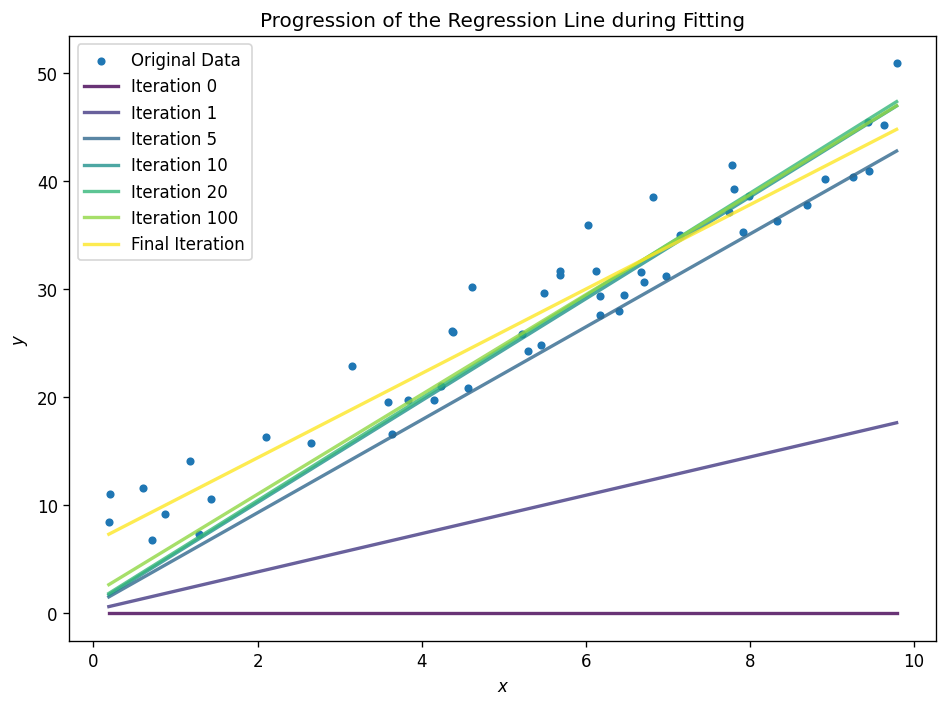

In [ ]:
# --- Visualization of the fitting process over iterations ---

fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

# Plot the original data points
ax.scatter(x, y, s=15, label='Original Data')

# Define which iterations to plot
# We can't plot all 1000, so we select a few key steps
iterations_to_plot = [0, 1, 5, 10, 20, 100, -1] # -1 means the final iteration

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(iterations_to_plot)))

# Plot the line at different stages
for i, iter_idx in enumerate(iterations_to_plot):
    # Get the parameters from the history arrays
    theta_0_at_iter = theta_0_grad_history[iter_idx]
    theta_1_at_iter = theta_1_grad_history[iter_idx]

    # Generate the line
    line_x = np.linspace(x.min(), x.max(), 100)
    line_y = theta_0_at_iter + theta_1_at_iter * line_x

    label_text = f'Iteration {iter_idx}' if iter_idx != -1 else 'Final Iteration'
    ax.plot(line_x, line_y, color=colors[i], linewidth=2, label=label_text, alpha=0.8)

# Add labels and title
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Progression of the Regression Line during Fitting')
ax.legend()
plt.tight_layout()
plt.show()

#### The Path Down the Cost Function Hill

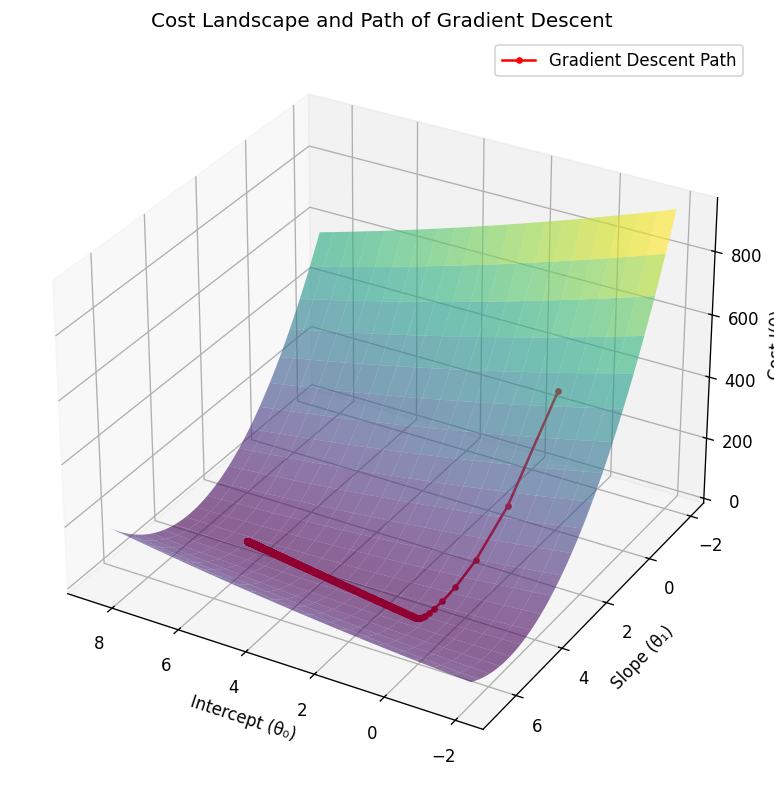

In [ ]:
# --- Visualization of the cost function landscape and the gradient descent path ---

from mpl_toolkits.mplot3d import Axes3D

# --- 1. Create the cost function landscape ---

# Generate a grid of theta_0 and theta_1 values
theta_0_vals = np.linspace(theta_0_grad_history.min() - 2, theta_0_grad_history.max() + 2, 100)
theta_1_vals = np.linspace(theta_1_grad_history.min() - 2, theta_1_grad_history.max() + 2, 100)
T0, T1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Calculate the cost (J) for each point on the grid
# Use a vectorized cost function for speed
def cost_function_vectorized(theta_0, theta_1, x, y):
    m = len(y)
    predictions = theta_0 + theta_1 * x
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

# Apply the cost function to every point in the meshgrid
costs = np.array([cost_function_vectorized(t0, t1, x, y) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])
J = costs.reshape(T0.shape)


# --- 2. Create the 3D plot ---
fig = plt.figure(figsize=(12, 8), dpi=120)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(T0, T1, J, cmap='viridis', alpha=0.6, rstride=5, cstride=5)

# --- 3. Plot the gradient descent path ---

# Calculate the cost for each step taken by the algorithm
path_costs = [cost_function_vectorized(t0, t1, x, y) for t0, t1 in zip(theta_0_grad_history, theta_1_grad_history)]

ax.plot(theta_0_grad_history, theta_1_grad_history, path_costs, color='red', marker='o', markersize=3, label='Gradient Descent Path')

# Add labels and title
ax.set_xlabel('Intercept (θ₀)')
ax.set_ylabel('Slope (θ₁)')
ax.set_zlabel('Cost J(θ)')
ax.set_title('Cost Landscape and Path of Gradient Descent')
ax.view_init(elev=30, azim=120) # Adjust viewing angle
plt.legend()
plt.show()

## Part II: Generalizing to n features with vectorized gradient descent

In [ ]:
data_path1 = "/content/gdrive/MyDrive/intro_ml/"
data_file1 = "ml_tutorial_1_bis.csv"

In [ ]:
df = pd.read_csv(data_file1)
df.head()

,x_1,x_2,y
0,9.585261,5.755257,8.842976
1,5.463598,-1.917614,6.389470
2,2.266284,6.318254,4.526080
3,9.230910,-4.276615,8.759727
4,-4.774850,-3.960585,2.081429


In [ ]:
"""
x1 = df["x_1"].to_numpy()
x2 = df["x_2"].to_numpy()
"""

x= df.drop("y", axis=1).to_numpy()
y= df["y"].to_numpy()

In [ ]:
# multiple feature linear hypothesis
def h_linear_multiple_feature(thetas, x, bias):
  # Calculate the dot product for each row of x
  h = np.dot(x, thetas) + bias
  return h

In [ ]:
# multiple feature linear cost function
def cost_function_multiple (thetas, x, y,bias):

  m= x.shape[0]

  h= h_linear_multiple_feature(thetas,x, bias)
  cost= np.sum((h- y)**2)
  mse = cost* 1/(2*m)
  return mse

In [ ]:
x1 = df["x_1"].to_numpy()
x2 = df["x_2"].to_numpy()

In [ ]:
def get_residuals_multiple(thetas, x, y, bias):

  der_theta_list=[]
  m= x.shape[0]
  h_bias = h_linear_multiple_feature(thetas, x, bias) - y # Calculate residuals once

  total_h_bias= np.sum(h_bias) # Sum the residuals for the bias term
  der_theta_bias= total_h_bias* (1/m)


  for i in range (len(thetas)):
    h_theta_i = h_bias * x[:, i] # Calculate residuals for each theta using h_bias
    total_h_theta_i = np.sum(h_theta_i) # Sum the residuals for each theta
    der_theta_i = total_h_theta_i * (1/m)
    der_theta_list.append(der_theta_i)

  return der_theta_list, der_theta_bias

In [ ]:
def should_print_iteration(iter_index, first_step, second_step, index_changing_step):
    """
    Trigger a print if iter_index matches step rules:
    print every `first_step` iterations before `index_changing_step`,
    then every `second_step` iterations afterwards.
    """
    if first_step <= 0 or second_step <= 0:
        raise ValueError("Steps must be positive integers.")

    if iter_index == 0:
        return True  # Always print at the first iteration

    if iter_index <= index_changing_step:
        return iter_index % first_step == 0
    else:
        return iter_index % second_step == 0

In [ ]:
#Hyperparameters

alpha   = 0.05
N       = 1000
epsilon = 0.0001 # tolerance threshold on gradients; exit if abs(gradients) < epsilon

# Initialization
theta_0=0
theta_init= np.zeros(x.shape[1])

# Check lists of x and y are of same length:
m = len(x)  # sample size
if m != len(y):
    raise ValueError("The lists of x and y values are not the same length!")

# Store parameter values for gradient descent visualizations
theta_0_grad_history = np.array([theta_0])
theta_1_grad_history = np.array([theta_init[0]]) # Assuming theta_init has at least one element
theta_2_grad_history = np.array([theta_init[1]]) # Assuming theta_init has at least two elements


print("Starting gradient descent\n")

# -------------------
#  Start iterations
# -------------------
theta_0_new = theta_0
theta_init_new = theta_init.copy() # Create a copy to avoid modifying the original array

for iter_idx in range(N):


    grad_theta_init , grad_theta_0 = get_residuals_multiple(theta_init_new , x , y, theta_0_new)

    theta_0_new = theta_0_new - alpha * grad_theta_0
    theta_init_new = theta_init_new - alpha * np.array(grad_theta_init) # Convert list to numpy array for element-wise subtraction
    cost = cost_function_multiple( theta_init_new, x, y, theta_0_new )


    # Store thetas (for plotting)
    theta_0_grad_history = np.append(theta_0_grad_history, theta_0_new)
    theta_1_grad_history = np.append(theta_1_grad_history, theta_init_new[0])
    theta_2_grad_history = np.append(theta_2_grad_history, theta_init_new[1])


    # Pretty print: every 10 iters until 100, then every 100 iters
    if should_print_iteration(iter_idx, 10, 100, 100):
        print(
            f"Iter {iter_idx:>4}\t"
            f"θ₀ = {theta_0_new:>7.3f}\t∂J/∂θ₀ = {grad_theta_0:>8.4f}\t"
            f"θs = {theta_init_new}\t\t∂J/∂θs = {grad_theta_init}\t"
            f"Cost = {cost:>8.5f}"
        )

    #___________________________

    # Your code here
    if abs(grad_theta_0) < epsilon and all(abs(g) < epsilon for g in grad_theta_init): # Check all gradients in the list
      print (f"Gradient converged, number of iterations {iter_idx+1} ")
      break



    #___________________________

print(f"\nEnd of gradient descent after {iter_idx+1} iterations")# Hyperparameters

Starting gradient descent

Iter    0	θ₀ =   0.210	∂J/∂θ₀ =  -4.2057	θs = [0.87831575 0.30059899]		∂J/∂θs = [np.float64(-17.566315016936862), np.float64(-6.011979800373305)]	Cost =  7.58802
Iter   10	θ₀ =   1.514	∂J/∂θ₀ =  -2.2383	θs = [0.60437742 0.09103944]		∂J/∂θs = [np.float64(-0.4953672575018534), np.float64(-1.75025318635153)]	Cost =  2.55648
Iter   20	θ₀ =   2.351	∂J/∂θ₀ =  -1.3739	θs = [0.56736964 0.01628719]		∂J/∂θs = [np.float64(-0.05574663488068629), np.float64(-0.2596824824373725)]	Cost =  1.12030
Iter   30	θ₀ =   2.883	∂J/∂θ₀ =  -0.8647	θs = [ 0.54872636 -0.01516628]		∂J/∂θs = [np.float64(0.009914503466119598), np.float64(-0.015757282743932153)]	Cost =  0.55315
Iter   40	θ₀ =   3.221	∂J/∂θ₀ =  -0.5481	θs = [ 0.53773073 -0.03234655]		∂J/∂θs = [np.float64(0.014240294358140048), np.float64(0.016121379336682055)]	Cost =  0.32444
Iter   50	θ₀ =   3.437	∂J/∂θ₀ =  -0.3481	θs = [ 0.53089146 -0.04277405]		∂J/∂θs = [np.float64(0.01044084753212826), np.float64(0.014822300300500416)]	C

## Part III: Let’s get classy with OOP

In [ ]:
"""
attributes:

weights
bias
learning_rate
n_iterations
loss_history

methods:
__init__(learning_rate,n_iterations)
fit(x,y)
predict(x)

score(x,y) - MSE score
"""

class LinearRegressor:
  def __init__(self, alpha = 0.05, n_iterations = 1000, epsilon = 0.0001):
    self.alpha = alpha
    self.n_iterations = n_iterations
    self.epsilon = epsilon
    self.weights = None
    self.bias = None
    self.loss_history = []

  def residuals(self, x, y):
    return get_residuals_multiple(self.weights, x, y, self.bias)

  def cost(self,x,y):
    return cost_function_multiple( self.weights, x, y, self.bias)

  def fit(self, x, y):
    n_features = x.shape[1]
    self.weights = np.zeros(n_features)
    self.bias   = 0.0

    # Check X and y match in sample size
    m = x.shape[0]
    if m != len(y):
        raise ValueError("The number of samples in X and y must match!")

    # Store parameter values for visualization
    self.loss_history  = [self.cost(x, y)]


    print("Starting gradient descent\n")

    # ----------------------
    # Start iterations
    # ----------------------
    for iter_idx in range(self.n_iterations):

        # ___________________________
        # Compute gradients
        dtheta, dbias = self.residuals(x, y)

        # Update parameters
        self.weights -= self.alpha * np.array(dtheta)
        self.bias   -= self.alpha * dbias

        cost = self.cost(x, y)
        # ___________________________

        # Store for plotting
        self.loss_history.append(cost)


        # Pretty print: every 10 iters until 100, then every 100 iters
        if should_print_iteration(iter_idx, 10, 100, 100):
            print(
                f"Iter {iter_idx:>4}\t"
                f"bias = {self.bias:>7.3f}\t∂J/∂bias = {dbias:>8.4f}\t"
                f"‖θ‖ = {np.linalg.norm(self.weights):>7.3f}\t‖∂J/∂θ‖ = {np.linalg.norm(np.array(dtheta)):>8.4f}\t"
                f"Cost = {cost:>8.5f}"
            )



        # Early stopping
        if np.all(np.abs(dtheta) < self.epsilon) and abs(dbias) < self.epsilon:
            print(f"\nConvergence reached! Stopping gradient descent after {iter_idx+1} iterations.")
            break

    print(f"\nEnd of gradient descent after {iter_idx+1} iterations")

  def predict(self, x):
    if self.weights is None or self.bias is None:
      raise ValueError("Model has not been trained yet. Call fit() first.")

    return h_linear_multiple_feature(self.weights, x, self.bias)


  def score(self, x, y):
    # returns MSE score by multiplying our original cost function by 2
    if self.weights is None or self.bias is None:
      raise ValueError("Model has not been trained yet. Call fit() first.")

    return (self.cost(x, y)) * 2

In [ ]:
test= LinearRegressor()
test.fit(x,y)

Starting gradient descent

Iter    0	bias =   0.210	∂J/∂bias =  -4.2057	‖θ‖ =   0.928	‖∂J/∂θ‖ =  18.5666	Cost =  7.58802
Iter   10	bias =   1.514	∂J/∂bias =  -2.2383	‖θ‖ =   0.611	‖∂J/∂θ‖ =   1.8190	Cost =  2.55648
Iter   20	bias =   2.351	∂J/∂bias =  -1.3739	‖θ‖ =   0.568	‖∂J/∂θ‖ =   0.2656	Cost =  1.12030
Iter   30	bias =   2.883	∂J/∂bias =  -0.8647	‖θ‖ =   0.549	‖∂J/∂θ‖ =   0.0186	Cost =  0.55315
Iter   40	bias =   3.221	∂J/∂bias =  -0.5481	‖θ‖ =   0.539	‖∂J/∂θ‖ =   0.0215	Cost =  0.32444
Iter   50	bias =   3.437	∂J/∂bias =  -0.3481	‖θ‖ =   0.533	‖∂J/∂θ‖ =   0.0181	Cost =  0.23205
Iter   60	bias =   3.573	∂J/∂bias =  -0.2212	‖θ‖ =   0.529	‖∂J/∂θ‖ =   0.0123	Cost =  0.19473
Iter   70	bias =   3.660	∂J/∂bias =  -0.1406	‖θ‖ =   0.527	‖∂J/∂θ‖ =   0.0080	Cost =  0.17965
Iter   80	bias =   3.715	∂J/∂bias =  -0.0894	‖θ‖ =   0.525	‖∂J/∂θ‖ =   0.0051	Cost =  0.17356
Iter   90	bias =   3.751	∂J/∂bias =  -0.0568	‖θ‖ =   0.524	‖∂J/∂θ‖ =   0.0032	Cost =  0.17110
Iter  100	bias =   3.773	∂J/∂bias